C:\Users\Raman\AppData\Local\Temp\ipykernel_6968\4160785515.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_trends_monthly = df_trends.resample('M').mean()


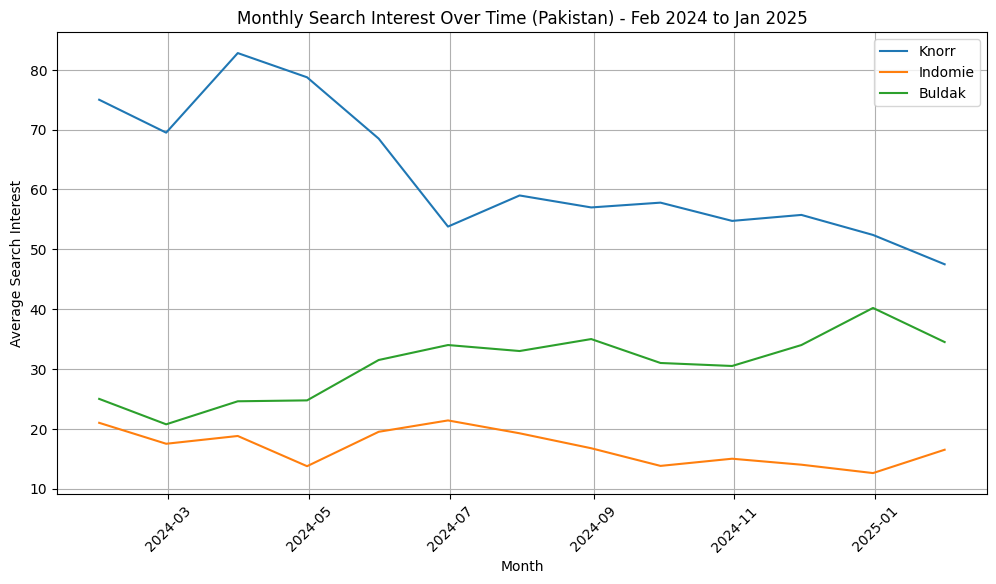

In [11]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define keywords for comparison
keywords = ["Knorr", "Indomie", "Buldak"]

# Set up search parameters (Feb 2024 to Jan 2025, Pakistan)
pytrends.build_payload(kw_list=keywords, timeframe='2024-02-01 2025-01-31', geo='PK', gprop='')

# Get interest over time
df_trends = pytrends.interest_over_time()

# Ensure data exists before processing
if df_trends.empty:
    print("No search trend data available for the selected keywords in Pakistan.")
else:
    # Resample to monthly frequency by taking the mean of each month
    df_trends_monthly = df_trends.resample('M').mean()

    # Plot the monthly search interest trends
    plt.figure(figsize=(12, 6))
    for keyword in keywords:
        plt.plot(df_trends_monthly.index, df_trends_monthly[keyword], label=keyword)

    plt.title("Monthly Search Interest Over Time (Pakistan) - Feb 2024 to Jan 2025")
    plt.xlabel("Month")
    plt.ylabel("Average Search Interest")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Export to CSV
    df_trends_monthly.drop(columns=['isPartial']).to_csv('google_search_trends_monthly.csv')


In [12]:
df = pd.read_csv('google_search_trends_monthly.csv')

In [13]:
df

,date,Knorr,Indomie,Buldak
0,2024-01-31,75.00,21.00,25.00
1,2024-02-29,69.50,17.50,20.75
2,2024-03-31,82.80,18.80,24.60
3,2024-04-30,78.75,13.75,24.75
4,2024-05-31,68.50,19.50,31.50
5,2024-06-30,53.80,21.40,34.00
6,2024-07-31,59.00,19.25,33.00
7,2024-08-31,57.00,16.75,35.00
8,2024-09-30,57.80,13.80,31.00
9,2024-10-31,54.75,15.00,30.50


In [14]:
# Convert date to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])
# Format date to 'mmm-yy' format (lowercase)
df['date'] = df['date'].dt.strftime('%b-%y').str.lower()

In [15]:
df

,date,Knorr,Indomie,Buldak
0,jan-24,75.00,21.00,25.00
1,feb-24,69.50,17.50,20.75
2,mar-24,82.80,18.80,24.60
3,apr-24,78.75,13.75,24.75
4,may-24,68.50,19.50,31.50
5,jun-24,53.80,21.40,34.00
6,jul-24,59.00,19.25,33.00
7,aug-24,57.00,16.75,35.00
8,sep-24,57.80,13.80,31.00
9,oct-24,54.75,15.00,30.50
